In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
trainDataset = pd.read_csv("drugsComTrain_raw.tsv", sep = '\t')
testDataset = pd.read_csv("drugsComTest_raw.tsv", sep = '\t')

print('trainDataset size' , trainDataset.shape)
print('testDataset size' , testDataset.shape)

trainDataset size (161297, 7)
testDataset size (53766, 7)


In [4]:
data = pd.concat([trainDataset, testDataset])
print('Final concatenated Dataset ', data.shape)
data.head()


Final concatenated Dataset  (215063, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
# !pip install transformers

In [6]:
# from transformers import pipeline

# sent_pipeline = pipeline("sentiment-analysis")

In [7]:
data.columns = ['Id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
data.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [8]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()
data.shape

(213869, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           213869 non-null  int64  
 1   drugName     213869 non-null  object 
 2   condition    213869 non-null  object 
 3   review       213869 non-null  object 
 4   rating       213869 non-null  float64
 5   date         213869 non-null  object 
 6   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [10]:
data['Id'].nunique()

213869

In [11]:
data['review'][1]

1    "My son is halfway through his fourth week of ...
1    "My son has Crohn&#039;s disease and has done ...
Name: review, dtype: object

In [12]:
data['rating'].value_counts()

rating
10.0    67682
9.0     36499
1.0     28769
8.0     24909
7.0     12470
5.0     10650
2.0      9203
3.0      8662
6.0      8403
4.0      6622
Name: count, dtype: int64

# Review Counts based on ratings

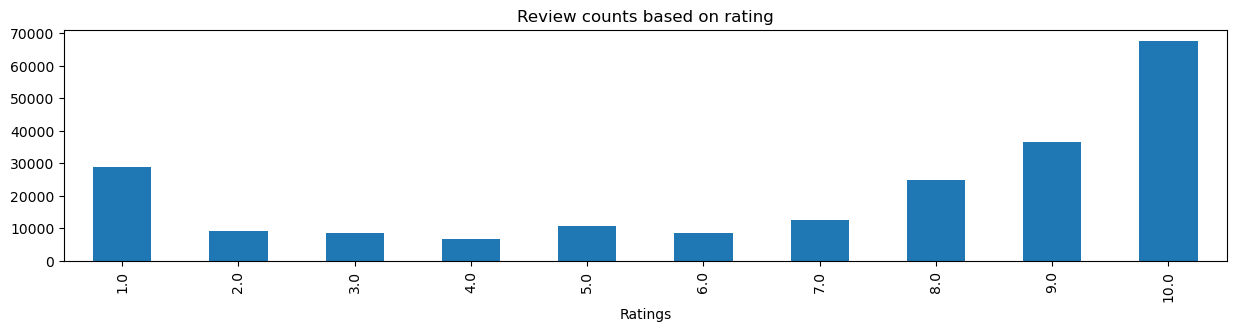

In [13]:
ax = data['rating'].value_counts().sort_index() \
    .plot(
        kind='bar', 
        title="Review counts based on rating",
        figsize=((15, 3))
    )
ax.set_xlabel('Ratings')
plt.show()

In [14]:
totalSentimentCounts = {}

totalSentimentCounts['Negative'] = len(data[data['rating'] < 4])
totalSentimentCounts['Neutral'] = len(data[(data['rating'] >= 5) & (data['rating'] < 7) ])
totalSentimentCounts['Positive'] = len(data[data['rating'] >= 7.0])

print(totalSentimentCounts['Positive'], totalSentimentCounts['Negative'], totalSentimentCounts['Neutral'])

141560 46634 19053


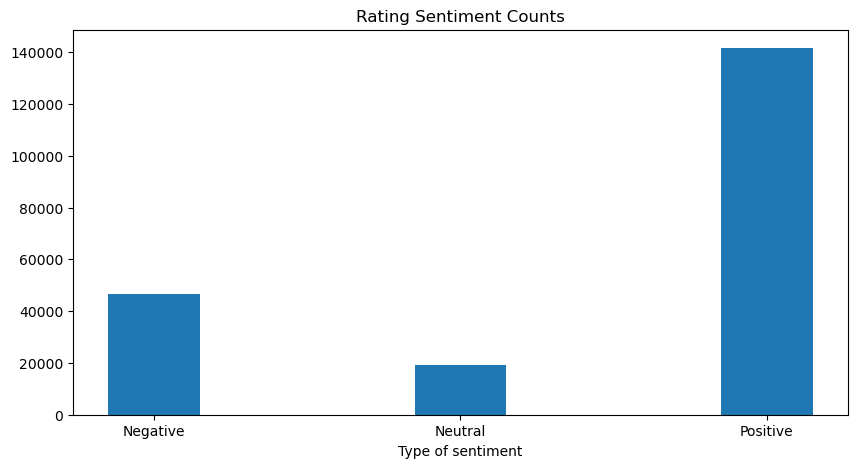

In [15]:
labels = list(totalSentimentCounts.keys())
values = list(totalSentimentCounts.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, width = 0.3)
plt.title("Rating Sentiment Counts")
plt.xlabel("Type of sentiment")
plt.show()

In [194]:
data.loc[data['rating'] >= 7.0,"ratingSentimentLabel"] ="positive"
data.loc[(data['rating'] >= 4.0) & (data['rating']<7.0),"ratingSentimentLabel"]= "neutral"
data.loc[data['rating']<= 3.0,"ratingSentimentLabel"] = "negative"

data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,"""It side effect, I take combination Bystolic 5..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,"""My son halfway fourth week Intuniv. We became..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,"""I used take another oral contraceptive, 21 pi..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,"""This first time using form birth control. I&#..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,"""Suboxone completely turned life around. I fee..."


In [195]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [196]:
# Stop words using normal looping + TO DO: REMOVE THIS LATER

# for row in data['review']:
#     for item in row.split():
#         if(item not in stopwords):
#             print(item)
#             break

# Removing stopwords from review columns
data['cleanReview'] = data['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [197]:
data['cleanReview'][0]

0    "It side effect, I take combination Bystolic 5...
0    "I&#039;ve tried antidepressants years (citalo...
Name: cleanReview, dtype: object

In [198]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the DF series
data['cleanReview'] = data['cleanReview'].apply(remove_punctuations)


In [199]:
# Clean Reviews after removing punctuations
data['cleanReview'].head(10)

0    It side effect I take combination Bystolic 5 M...
1    My son halfway fourth week Intuniv We became c...
2    I used take another oral contraceptive 21 pill...
3    This first time using form birth control I039m...
4    Suboxone completely turned life around I feel ...
5    2nd day 5mg started work rock hard erections h...
6    He pulled out cummed bit me I took Plan B 26 h...
7    Abilify changed life There hope I Zoloft Cloni...
8     I Ve nothing problems Keppera  constant shaki...
9    I pill many years When doctor changed RX chate...
Name: cleanReview, dtype: object

# NLTK - VADER Sentiment Scoring - Uses Bag of Words (BOW)

In [200]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# data = data.head(50000)

In [201]:
data['vaderReviewScore'] = data['cleanReview'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [202]:
data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,vaderReviewScore
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,0.0000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,0.9068
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,0.7096
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,0.7184
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,0.9403


In [203]:
totalVaderSentimentCounts = {}

totalVaderSentimentCounts['Positive'] = len(data[data['vaderReviewScore'] >= 0.05])
totalVaderSentimentCounts['Negative'] = len(data[(data['vaderReviewScore'] > -0.05) & (data['vaderReviewScore'] < 0.05) ])
totalVaderSentimentCounts['Neutral'] = len(data[data['vaderReviewScore'] <-0.05])

print(totalVaderSentimentCounts['Positive'], totalVaderSentimentCounts['Negative'], totalVaderSentimentCounts['Neutral'])

102865 10166 100833


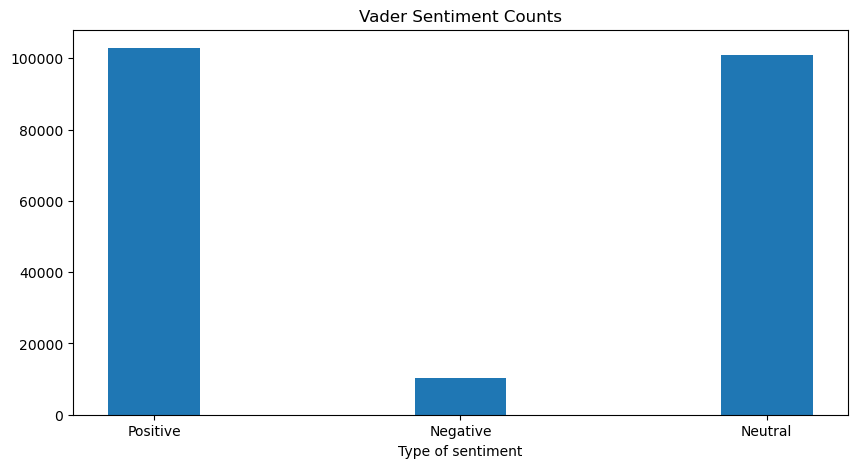

In [204]:
labels = list(totalVaderSentimentCounts.keys())
values = list(totalVaderSentimentCounts.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, width = 0.3)
plt.title("Vader Sentiment Counts")
plt.xlabel("Type of sentiment")
plt.show()

In [205]:
data['vaderSentiment'] = data['vaderReviewScore'].map(lambda x: int(2) if x >=0.05  else int(1) if x<=-0.05 else int(0))

In [206]:
Total_vaderSentiment = totalSentimentCounts['Positive'] + totalSentimentCounts['Negative'] + totalSentimentCounts['Neutral']
Total_vaderSentiment

207247

In [207]:
data.loc[data['vaderReviewScore'] >=0.05,"vaderSentimentLabel"] = "positive"
data.loc[(data['vaderReviewScore'] >-0.05) & (data['vaderReviewScore']<0.05),"vaderSentimentLabel"]= "neutral"
data.loc[data['vaderReviewScore']<=-0.05,"vaderSentimentLabel"] = "negative"

data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,0.0000,0,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,0.9068,2,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,0.7096,2,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,0.7184,2,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,0.9403,2,positive


In [208]:
data.loc[data['rating'] >= 7.0,"ratingSentimentLabel"] = "positive"
data.loc[(data['rating'] >= 5.0) & (data['rating'] <= 7),"ratingSentimentLabel"] = "neutral"
data.loc[data['rating'] <= 3.0,"ratingSentimentLabel"] = "negative"
data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,0.0000,0,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,0.9068,2,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,0.7096,2,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,0.7184,2,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,0.9403,2,positive


In [210]:
data.to_csv('reviews_processed.csv')

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,0.0000,0,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,0.9068,2,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,0.7096,2,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,0.7184,2,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,0.9403,2,positive


In [212]:
import os
os.stat('reviews_processed.csv').st_size         # Check size of csv file About 181MB

186038011

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Id                    213869 non-null  int64  
 1   drugName              213869 non-null  object 
 2   condition             213869 non-null  object 
 3   review                213869 non-null  object 
 4   rating                213869 non-null  float64
 5   date                  213869 non-null  object 
 6   usefulCount           213869 non-null  int64  
 7   ratingSentimentLabel  213869 non-null  object 
 8   cleanReview           213869 non-null  object 
 9   vaderReviewScore      213869 non-null  float64
 10  vaderSentiment        213869 non-null  int64  
 11  vaderSentimentLabel   213869 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 29.3+ MB


In [246]:
data.to_csv('reviews_processed.csv.gz',compression='gzip')

In [247]:
os.stat('reviews_processed.csv.gz').st_size    #compressed to about 54MB 

61112650

In [248]:
data.groupby('vaderSentimentLabel').size()

vaderSentimentLabel
negative    100838
neutral      10166
positive    102865
dtype: int64

In [249]:
data.columns
data2 = data[['Id', 'cleanReview', 'rating', 'ratingSentimentLabel', 'vaderReviewScore', 'vaderSentimentLabel', 'vaderSentiment']].copy()    # creating a new dataframe with just review and rating for sentiment analysis
data2

,Id,cleanReview,rating,ratingSentimentLabel,vaderReviewScore,vaderSentimentLabel,vaderSentiment
0,206461,It side effect I take combination Bystolic 5 M...,9.0,positive,0.0000,neutral,0
1,95260,My son halfway fourth week Intuniv We became c...,8.0,positive,0.9068,positive,2
2,92703,I used take another oral contraceptive 21 pill...,5.0,neutral,0.7096,positive,2
3,138000,This first time using form birth control I039m...,8.0,positive,0.7184,positive,2
4,35696,Suboxone completely turned life around I feel ...,9.0,positive,0.9403,positive,2
...,...,...,...,...,...,...,...
53761,159999,I taken Tamoxifen 5 years Side effects severe ...,10.0,positive,-0.8924,negative,1
53762,140714,I039ve taking Lexapro escitaploprgram since Fe...,9.0,positive,0.9223,positive,2
53763,130945,I039m married 34 years old I kids Taking pill ...,8.0,positive,-0.8471,negative,1
53764,47656,I prescribed Nucynta severe neckshoulder pain ...,1.0,negative,-0.9260,negative,1


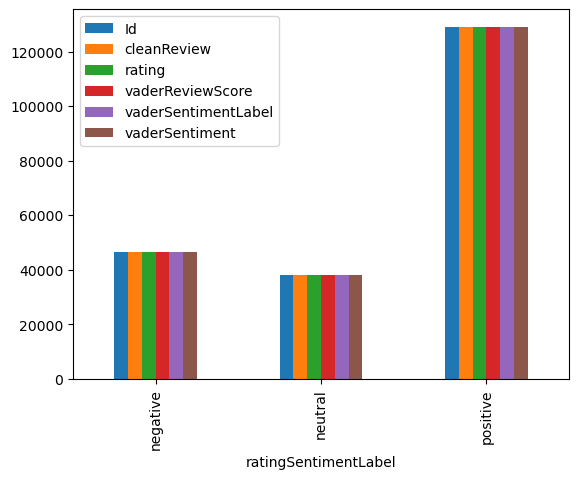

In [251]:
data2.groupby('ratingSentimentLabel').size()
data2.groupby('ratingSentimentLabel').count().plot.bar()
plt.show()

In [257]:
data2['ratingSentiment']= data2['rating'].map(lambda x:int(2) if x>=7 else int(1) if x<=3 else int(0) )
data2.head()

,Id,cleanReview,rating,ratingSentimentLabel,vaderReviewScore,vaderSentimentLabel,vaderSentiment,ratingSentiment
0,206461,It side effect I take combination Bystolic 5 M...,9.0,positive,0.0000,neutral,0,2
1,95260,My son halfway fourth week Intuniv We became c...,8.0,positive,0.9068,positive,2,2
2,92703,I used take another oral contraceptive 21 pill...,5.0,neutral,0.7096,positive,2,0
3,138000,This first time using form birth control I039m...,8.0,positive,0.7184,positive,2,2
4,35696,Suboxone completely turned life around I feel ...,9.0,positive,0.9403,positive,2,2


In [259]:
data2.groupby('ratingSentiment').size()

(213869, 8)

In [260]:
positive_vader_sentiments = data2[data2.ratingSentiment == 2]
positive_string = []
for s in positive_vader_sentiments.cleanReview:
  positive_string.append(s)
positive_string = pd.Series(positive_string).str.cat(sep=' ')

In [264]:
!pip install wordcloud

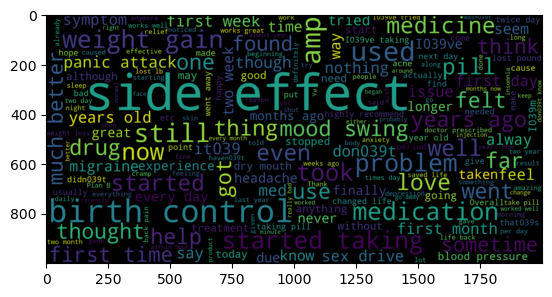

In [263]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(positive_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(data2.cleanReview)
labels   = data2.vaderSentiment
data2.head()
features

NameError: name 'data2' is not defined

In [270]:
features.shape

(213869, 1763716)

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [272]:
x_train,x_test,y_train,y_test = train_test_split(data2['cleanReview'],data2['ratingSentimentLabel'],random_state=0)

In [276]:
print(x_train.shape, x_test.shape)

(160401,) (53468,)


In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [278]:
models = [RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),LinearSVC(),MultinomialNB(),LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_cla

In [280]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.533525
1,RandomForestClassifier,1,0.550942
2,RandomForestClassifier,2,0.522677
3,RandomForestClassifier,3,0.542292
4,RandomForestClassifier,4,0.542328
5,LinearSVC,0,0.945528
6,LinearSVC,1,0.945200
7,LinearSVC,2,0.945504
8,LinearSVC,3,0.943611
9,LinearSVC,4,0.942814


In [284]:
cv_df.groupby('model_name').accuracy.mean()

24875     Olux topical medication I039ve used able contr...
160919    I quotbeach babyquot dropped beach althrough h...
45565     This exceptional drug pain relief side effects...
18904     Taking doxy rickettsia I feel like crap energy...
48369     After years Social AnxietyPanic attacks I sort...
                                ...                        
16650     Clindesse didn039t work  sure expensive My doc...
118627    I suffering fibromyalgia 6 years diagnosed off...
13357     I using Elmiron since February 2008 I love it ...
43831     I039m 33 years old I039ve medication 6 years M...
39150     I would good things say Strattera I could got ...
Name: cleanReview, Length: 160401, dtype: object

In [285]:
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
)

model = clf.fit(x_train, y_train)

# Predictions
predictions = model.predict(x_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
# confusion_matrix(y_test, predictions)

ValueError: could not convert string to float: 'Olux topical medication I039ve used able control psoriasis scalp Over past years condition significantly worsened However since beginning use DermaSmoothe Olux I able maintain healthy scalp The DermaSmoothe fantastic removing initial buildup psoriasis Olux great preventing return I use Olux every 2 weeks first sign symptoms Only downside high cost since high insurance deductible However I personally find worth money'

In [83]:
# from tqdm.notebook import tqdm

# res = {}

# for index, row in tqdm(data.iterrows(), total=len(data)):
#     res[index] = sia.polarity_scores(row['review'])

In [84]:
# vaderResults = pd.DataFrame(res)

# vaderResults = vaderResults.T

# vaderResults = vaderResults.reset_index().rename(columns={
#     'index' : 'Id'
# })

# # Final Dataset with vader polarity scores
# data = data.merge(vaderResults, how='left')

# data.head()


In [85]:
# from tqdm.notebook import tqdm

# for i, row in tqdm(data.iterrows(), total=len(data)):
#     reviewText = row['review']
#     vader_sentiments = sia.polarity_scores(reviewText)
    
#     # Vader sentiment polarity
#     data['vader_neg'] = vader_sentiments['neg']
#     data['vader_neu'] = vader_sentiments['neu']
#     data['vader_pos'] = vader_sentiments['pos']
#     data['vader_compound'] = vader_sentiments['compound']

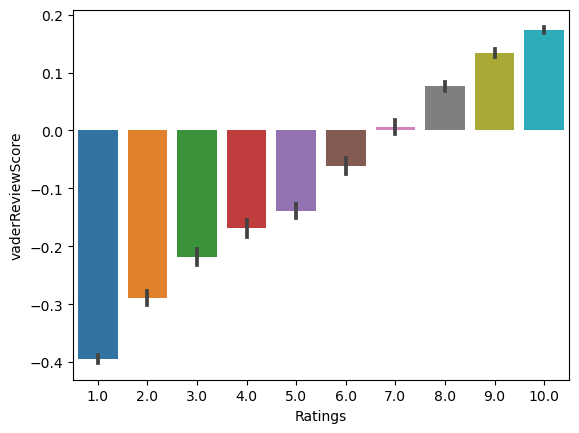

In [265]:
import seaborn as sns

ax = sns.barplot(data=data2, x = 'rating', y = 'vaderReviewScore')
ax.set_xlabel('Ratings')
plt.show()

In [173]:
# fig, axs = plt.subplots(1,3, figsize=(15,3))
# sns.barplot(data=data, x = 'rating', y = 'pos', ax=axs[0])
# sns.barplot(data=data, x = 'rating', y = 'neu', ax=axs[1])
# sns.barplot(data=data, x = 'rating', y = 'neg', ax=axs[2])
# axs[0].set_title('Positive')
# axs[1].set_title('Neutral')
# axs[2].set_title('Negative')
# plt.show()

In [174]:
# Text Tokenization and Cleaning
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# stop_words = set(stopwords.words('english'))

# def clean_text(text):
#     text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
#     text = text.lower()  # convert to lowercase
#     tokens = word_tokenize(text)  # tokenize text
#     filtered_tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
#     return ' '.join(filtered_tokens)

# data['clean_review'] = data['review'].apply(clean_text)

# Feature Engineering
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['clean_review'])
y = data['sentiment']

KeyError: 'clean_review'

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Sentiment Classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classificati_report(y_test, y_onpred))

Accuracy: 0.825759454432734
Classification Report:


NameError: name 'classificati_report' is not defined

In [ ]:
# Sentiment Analysis
data['predicted_sentiment'] = classifier.predict(tfidf_vectorizer.transform(data['clean_review']))

# Displaying the results
print(data[['review', 'rating', 'sentiment', 'predicted_sentiment']].head(10))

                                              review  rating sentiment  \
0  "It has no side effect, I take it in combinati...     9.0  positive   
1  "My son is halfway through his fourth week of ...     8.0  positive   
2  "I used to take another oral contraceptive, wh...     5.0   neutral   
3  "This is my first time using any form of birth...     8.0  positive   
4  "Suboxone has completely turned my life around...     9.0  positive   
5  "2nd day on 5mg started to work with rock hard...     2.0  negative   
6  "He pulled out, but he cummed a bit in me. I t...     1.0  negative   
7  "Abilify changed my life. There is hope. I was...    10.0  positive   
8  " I Ve had  nothing but problems with the Kepp...     1.0  negative   
9  "I had been on the pill for many years. When m...     8.0  positive   

  predicted_sentiment  
0            positive  
1            positive  
2            positive  
3            positive  
4            positive  
5            positive  
6            nega